# **Colors**

Colors are often represented in computers as vectors with three dimensions:  *Red*, *Green*, and *Blue* (RGB). In other words, a color is expressed as an RGB triplet $(r,g,b)$, each component of which can vary from zero to a defined maximum value:

![rgb slider](https://upload.wikimedia.org/wikipedia/commons/1/12/RGB_sliders.svg)

If all the components are at zero the result is black. If, by contrast, all are at maximum, the result is the brightest representable white.


In this notebook, you will practice basic vector operations with color vectors from an [xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/).

## **Loading the data**

First, we'll load the original JSON-file into a Python dictionary.

In [1]:
import requests, json

url = 'https://raw.githubusercontent.com/evgeniyako-edu/corpora/master/data/colors/xkcd.json'
response = requests.get(url)

raw_data = json.loads(response.text)

ModuleNotFoundError: No module named 'requests'

Take a look at the content of $\texttt{raw_data}$.

In [2]:
raw_data

{'description': 'The 954 most common RGB monitor colors, as defined by several hundred thousand participants in the xkcd color name survey.',
 'colors': [{'color': 'cloudy blue', 'hex': '#acc2d9'},
  {'color': 'dark pastel green', 'hex': '#56ae57'},
  {'color': 'dust', 'hex': '#b2996e'},
  {'color': 'electric lime', 'hex': '#a8ff04'},
  {'color': 'fresh green', 'hex': '#69d84f'},
  {'color': 'light eggplant', 'hex': '#894585'},
  {'color': 'nasty green', 'hex': '#70b23f'},
  {'color': 'really light blue', 'hex': '#d4ffff'},
  {'color': 'tea', 'hex': '#65ab7c'},
  {'color': 'warm purple', 'hex': '#952e8f'},
  {'color': 'yellowish tan', 'hex': '#fcfc81'},
  {'color': 'cement', 'hex': '#a5a391'},
  {'color': 'dark grass green', 'hex': '#388004'},
  {'color': 'dusty teal', 'hex': '#4c9085'},
  {'color': 'grey teal', 'hex': '#5e9b8a'},
  {'color': 'macaroni and cheese', 'hex': '#efb435'},
  {'color': 'pinkish tan', 'hex': '#d99b82'},
  {'color': 'spruce', 'hex': '#0a5f38'},
  {'color': 'str

You can notice that the original format is not very convenient to use. Let's convert hex color values into RGB-triplets and create a new dictionary {$\texttt{"color_name": [r, g, b]}$}.

Run the cells below to do so.

In [3]:
def hex_to_rgb(color_hex):
    color_hex = color_hex.lstrip("#")
    return [int(color_hex[:2], 16), int(color_hex[2:4], 16), int(color_hex[4:6], 16)]

In [4]:
colors = dict()

for item in raw_data['colors']:
    colors[item['color']] = hex_to_rgb(item['hex'])

Take a look at the content of the $\texttt{colors}$ dictionary now.

In [5]:
# Your code here
colors

{'cloudy blue': [172, 194, 217],
 'dark pastel green': [86, 174, 87],
 'dust': [178, 153, 110],
 'electric lime': [168, 255, 4],
 'fresh green': [105, 216, 79],
 'light eggplant': [137, 69, 133],
 'nasty green': [112, 178, 63],
 'really light blue': [212, 255, 255],
 'tea': [101, 171, 124],
 'warm purple': [149, 46, 143],
 'yellowish tan': [252, 252, 129],
 'cement': [165, 163, 145],
 'dark grass green': [56, 128, 4],
 'dusty teal': [76, 144, 133],
 'grey teal': [94, 155, 138],
 'macaroni and cheese': [239, 180, 53],
 'pinkish tan': [217, 155, 130],
 'spruce': [10, 95, 56],
 'strong blue': [12, 6, 247],
 'toxic green': [97, 222, 42],
 'windows blue': [55, 120, 191],
 'blue blue': [34, 66, 199],
 'blue with a hint of purple': [83, 60, 198],
 'booger': [155, 181, 60],
 'bright sea green': [5, 255, 166],
 'dark green blue': [31, 99, 87],
 'deep turquoise': [1, 115, 116],
 'green teal': [12, 181, 119],
 'strong pink': [255, 7, 137],
 'bland': [175, 168, 139],
 'deep aqua': [8, 120, 127],
 

## **Plotting the data**

To have a better idea of which colors are present in our dataset, let's plot them as points in a 3D space (with Red, Green and Blue as axes).

Assign each point a color that it represents.

Hint 1: [$\texttt{scatter3D}$](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) function from the $\texttt{matplotlib}$ library might be useful for plotting points in 3D.

Hint 2: In $\texttt{matplotlib}$, you can specify color by giving it's name from the xkcd survey with an $\texttt{'xkcd:'}$ prefix. See [documentation](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) for more info.

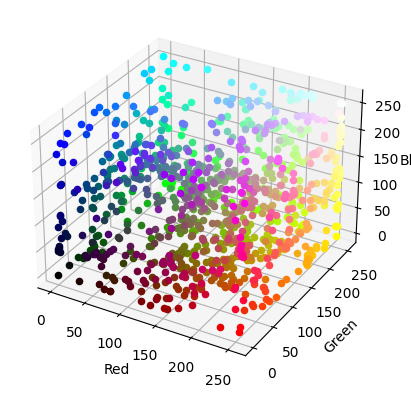

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Your code here
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for color in colors:
  ax.scatter(colors[color][0],colors[color][1],colors[color][2],c = 'xkcd:' + color)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

Take a look at the plot you've obtained. Where are 'redish', 'greenish' and 'blueish' colors located? What can you say about the location of similar colors?

## **Distances between colors**

Recall that Euclidian distance between two points $x=(x_1, ..., x_n)$ and $y = (y_1, ..., y_n)$ in an $n$-dimensional space is defined as follows:

$dist(x, y) = ||x-y||_2 = \sqrt{(x_1-y_1)^2 + ... + (x_n-y_n)^2}$.

Implement a function that computed Euclidian distance between two colors in the RGB-space.

In [10]:
import numpy as np

def distance(color1, color2):
  dist = np.sqrt(np.square(color1[0]- color2[0])+np.square(color1[1]- color2[1])+np.square(color1[2]- color2[2]))
  return dist

Try to use your function for computing distances between different colors in the data. What do you observe?

In [11]:
distance(colors['red'], colors['dark red'])

97.0

In [12]:
distance(colors['red'], colors['blue'])

324.49036965678965

Now, implement a function that, given some RGB-vector, returns $n$ closest colors from our $\texttt{colors}$ dictionary.

In [13]:
a = ("Jenifer", "Sally", "Jane")
x = sorted(a, key=len)
print(x)

['Jane', 'Sally', 'Jenifer']


In [29]:
def find_n_closest(colors, new_color, n=5):
  # Your code here
  closest = []

  for color in sorted(colors.keys(), key = lambda x: distance(new_color,colors[x]))[:n]:
    closest.append(color)
  return closest

Now, let's take some random new color and find $n=10$ closest colors to it in our dictionary.

Experiment with different colors!

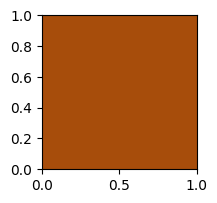

In [50]:
n = 10
new_color = [152, 70, 10]
fig,ax = plt.subplots(1,1,figsize=(2,2))
ax.set_facecolor(np.array(new_color)/sum(new_color))

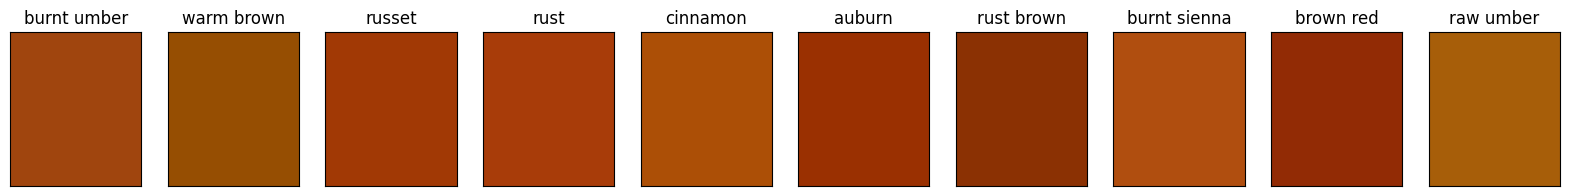

In [51]:
n = 10
closests = find_n_closest(colors, new_color, n)
closests
fig, ax = plt.subplots(1,n,figsize=(2*n,2))
for i, closest in enumerate(closests):
  ax[i].set_facecolor('xkcd:'+closest)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  ax[i].set_title(closest)



## **Operations with color vectors**

Let's now try to perform some vector operations on the RGB-vectors.

### Vector addition

Define a function that sums up to vectors.

In [57]:
def add_colors(color1, color2):
  # Your code here
  return [c1+c2 for c1,c2 in zip(color1,color2)]

Let's consider two colors, for example $\texttt{red}$ and $\texttt{blue}$:

Text(0.5, 1.0, 'blue')

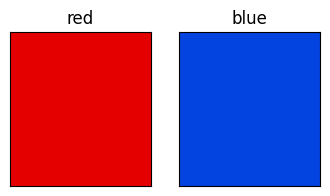

In [35]:
color1 = 'red'
color2 = 'blue'

# Plotting the colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

Which colors in our dictionary are the closest to the sum of those two colors?

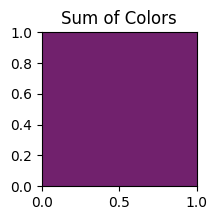

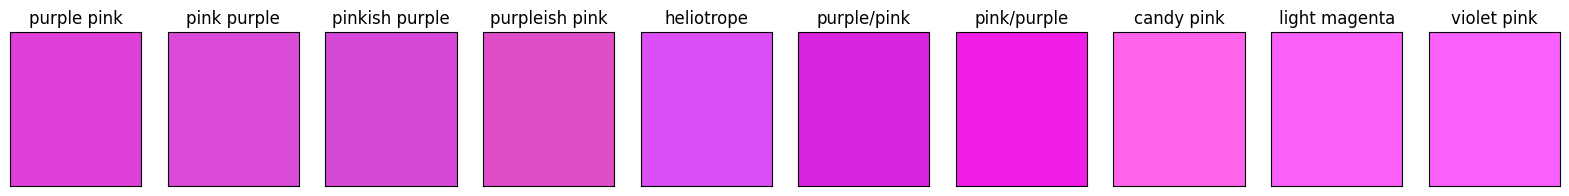

In [69]:
# Your code here
s = add_colors(colors[color1],colors[color2])
fig1,ax1 = plt.subplots(1,1,figsize=(2,2))
ax1.set_facecolor(np.array(s)/sum(s))
ax1.set_title('Sum of Colors')
closests = find_n_closest(colors,s,10)
closests
n = 10
fig, ax = plt.subplots(1,n,figsize=(2*n,2))
for i,closest in enumerate(closests):
  ax[i].set_facecolor('xkcd:'+closest)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  ax[i].set_title(closest)


Experiment with more colors!

### Vector subtraction

Define a function that subtracts one vector from the other.

In [76]:
def subtract_colors(color1, color2):
  result = [c1-c2 for c1,c2 in zip(color1,color2)]
  normalized_result = [max(0, min(1, c)) for c in result]
  return normalized_result

Now, let's consider $\texttt{purple}$ and $\texttt{red}$:

Text(0.5, 1.0, 'red')

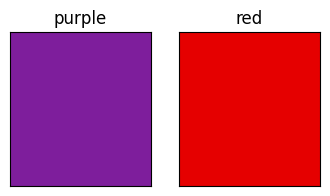

In [77]:
color1 = 'purple'
color2 = 'red'

# Plotting the colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

What does the difference between them looks like? Find the closest colors n our dictionary.

[0, 1, 1]


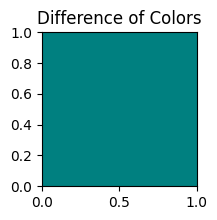

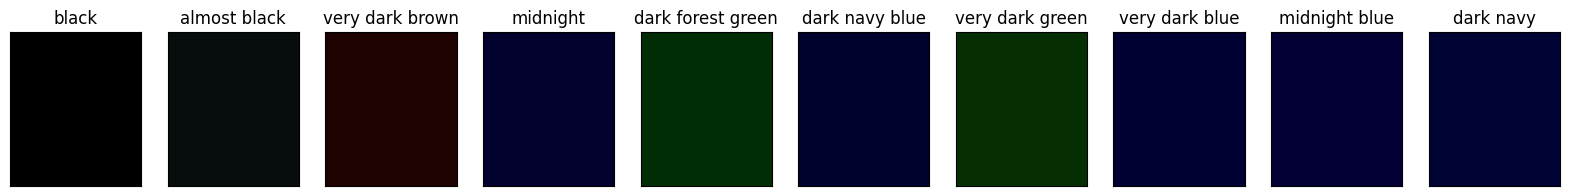

In [79]:
# Your code here
s = subtract_colors(colors[color1],colors[color2])
print(subtract)
fig1,ax1 = plt.subplots(1,1,figsize=(2,2))
ax1.set_facecolor(np.array(subtract)/sum(subtract))
ax1.set_title('Difference of Colors')
closests = find_n_closest(colors,s,10)
closests
n = 10
fig, ax = plt.subplots(1,n,figsize=(2*n,2))
for i,closest in enumerate(closests):
  ax[i].set_facecolor('xkcd:'+closest)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  ax[i].set_title(closest)



## **References**

This notebook is inspired by a [tutorial by Allison Parrish](https://gist.github.com/aparrish/2f562e3737544cf29aaf1af30362f469).